### 2024/01/15 一つの形状の線のみを入力してみる

In [131]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from sklearn import datasets
import seaborn as sns
import umap
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from view_function import ViewFunction
vf = ViewFunction()

palette = ['red', 'blue', 'green', 'yellow', 'black']

In [2]:
all_shape = pd.read_pickle('../temp/abcs_box_nopt.pkl')

In [3]:
strt = all_shape[all_shape['shape_int'] == 1]
curv = all_shape[all_shape['shape_int'] == 2]
comp = all_shape[all_shape['shape_int'] == 3]
hatc = all_shape[all_shape['shape_int'] == 4]

In [7]:
# 入力する線種
input_df = strt[:942]
input_nparray = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])

In [39]:
##### 調整可能パラメータ #####
perplexity = [ i for i in range(5, 51, 1)]
n_iter = [ 1000, 2000, 3000, 4000]

##### マッピング #####
for param in n_iter:
    tsne_model = TSNE(
                    n_components=2,
                    perplexity=30,
                    early_exaggeration=12.0, 
                    learning_rate='auto',
                    n_iter=param,
                    n_iter_without_progress=300,
                    min_grad_norm=1e-07,
                    metric='euclidean',
                    metric_params=None,
                    init='pca',
                    verbose=0,
                    random_state=None, 
                    method='barnes_hut',
                    angle=0.5,
                    n_jobs=None
                    )

    tsne_result = tsne_model.fit_transform(input_nparray)

    input_df[f'embed_ax0'] = tsne_result[:, 0:1]
    input_df[f'embed_ax1'] = tsne_result[:, 1:2]
    
    input_df.to_excel(f'../temp/20240115_tsne_strt_perp30_niter{param}.xlsx')
    print(f'finish | {param}')

C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax0'] = tsne_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax1'] = tsne_result[:, 1:2]


finish | 1000


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax0'] = tsne_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax1'] = tsne_result[:, 1:2]


finish | 2000


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax0'] = tsne_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax1'] = tsne_result[:, 1:2]


finish | 3000


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax0'] = tsne_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\320045265.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[f'embed_ax1'] = tsne_result[:, 1:2]


finish | 4000


In [8]:
# 入力する線種
input_df = strt
input_nparray = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])

In [38]:
##### 調整可能パラメータ #####
n_neighbors = [ 3, 5, 10, 15, 20, 25, 50, 100, 200]
min_dist = [ i*0.01 for i in range(0, 100, 1)]

##### マッピング #####
for n in n_neighbors:
    mapper = umap.UMAP(n_components=2, 
                    n_neighbors=n,
                    min_dist=0.1,
                    metric = "euclidean"
                    )
    umap_result = mapper.fit_transform(input_nparray)

    input_df['axis0'] = umap_result[:, 0:1]
    input_df['axis1'] = umap_result[:, 1:2]
    input_df.to_excel(f'../temp/20240115_umap_strt_mindist01_neighbors{n}.xlsx')
    print(f'finish | {n}')

c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\1622262498.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\1622262498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = uma

finish | 3


In [ ]:
n_neighbor = 5
df = pd.read_excel(f'../temp/20240115_umap_strt_mindist01_neighbors{n_neighbor}.xlsx')

<AxesSubplot: xlabel='axis0', ylabel='axis1'>

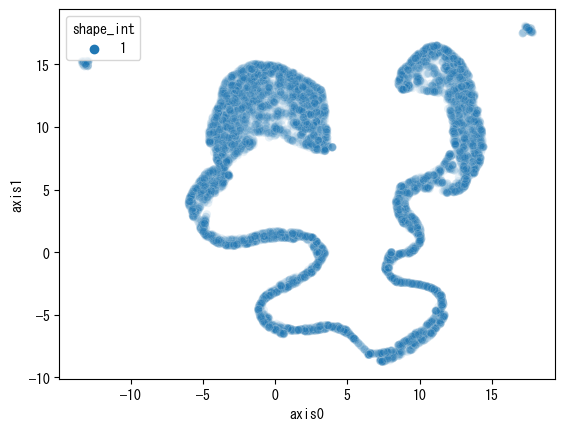

In [36]:
sns.scatterplot(x='axis0', y='axis1', hue=input_df['shape_int'], data=input_df, color='blue', alpha=0.1)

In [41]:
input_df.to_csv('../temp/umap_abcs_strt.tsv', sep='\t', index=False, encoding='shift-jis')



In [157]:
# 2013_4_18_紙箱_1_井原亜利紗_0_straight
def img_scatter(df, title='title'):
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (20, 20)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    # ax.set_xticks(np.linspace(-420, 420, 5))
    # ax.set_yticks(np.linspace(-297, 297, 5))
    ax.grid(True, alpha=0.5)
    for drawing_id, stroke_id, shape_int, axis0, axis1 in zip(df['drawing_id'], df['stroke_id'], df['shape_int'], df['axis0'], df['axis1']):
        image_path = f'../data/20240115_strokeimage_abcs_drawingid/{drawing_id}_{stroke_id}.jpg'
        image = plt.imread(image_path)
        zoom = 0.1
        oi = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(oi, (axis0, axis1), xycoords='data', frameon=False)
        artists = []
        artists.append(ax.add_artist(ab))
        ax.scatter(axis0, axis1, color=palette[shape_int], marker='o', alpha=1)
    plt.savefig(f'{title}.png')
    # plt.show()
    plt.close()

In [68]:
# n = 100
# seed = 1
# df_sample = input_df.sample(n=n, random_state=seed)
# img_scatter(df_sample)

In [67]:
# n_neighbors = [ 3, 5, 10, 15, 20, 25, 50, 100, 200, 300]
# path_umap = f'../temp/20240115_umap_strt_mindist01_neighbors{n_neighbors[9]}.xlsx'
# n_iter = [ 1000, 2000, 3000, 4000]
# path_tsne = f'../temp/20240115_tsne_strt_perp30_niter{n_iter[3]}.xlsx'


# df_show = pd.read_excel(path_tsne)
# sns.scatterplot(x='embed_ax0', y='embed_ax1', hue=df_show['shape_int'], data=df_show, color='blue', alpha=0.2)
# n = 200
# seed = 1
# df_sample = df_show.sample(n=n, random_state=seed)
# img_scatter(df_sample)

##### ▶同じ方向の直線のみを入力

In [152]:
# 3_13 ～ 3_119 まで 合計40個
drawing_id_3 = all_shape[all_shape['drawing_id'] == 3]
input_df = drawing_id_3[13:53]
input_nparray_x = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])
input_nparray_y = np.array([np.array(nparr) for nparr in input_df['pty_mm_slide_expand'].to_numpy()])

input_nparray_xy = np.array([ np.concatenate([x, y]) for x, y in zip(input_nparray_x, input_nparray_y)])

In [154]:
# for n_neighbors in [2, 5, 10, 15, 30, 50, 200]:
#     mapper = umap.UMAP(n_components=2, 
#                         n_neighbors=n_neighbors,
#                         min_dist=0.1,
#                         metric = "euclidean"
#                         )
#     umap_result = mapper.fit_transform(input_nparray_xy)

#     input_df['axis0'] = umap_result[:, 0:1]
#     input_df['axis1'] = umap_result[:, 1:2]
    
    
#     title = f'nneighbors_{n_neighbors}_1direction'
#     plt.rcParams['font.family'] = 'MS Gothic'
#     FIG_SIZE = (5, 5)
#     fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
#     ax.set_xlabel('axis0')
#     ax.set_ylabel('axis1')
#     ax.set_title(title)
#     ax.grid(True, alpha=0.5)
#     plt.scatter(input_df['axis0'], input_df['axis1'], color='blue', alpha=0.5)
#     plt.savefig(f'{title}_scatter.png')
#     plt.close()
#     img_scatter(input_df, title=title+'_img')
    

##### ▶違う2方向の直線を入力

In [155]:
# 3_13 ～ 3_32 までと 955_2743 ～ 955_2762 合計40個
did_3_sid_13_32 = all_shape.query('drawing_id == 3').query('13 <= stroke_id <= 32')
did_955_sid_2743_2762 = all_shape.query('drawing_id == 955').query('2743 <= stroke_id <= 2762')

input_df = pd.concat([did_3_sid_13_32, did_955_sid_2743_2762], axis=0)
input_df['direction_type'] = [0 for i in range(20)] + [1 for i in range(20)]

input_nparray_x = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])
input_nparray_y = np.array([np.array(nparr) for nparr in input_df['pty_mm_slide_expand'].to_numpy()])

input_nparray_xy = np.array([ np.concatenate([x, y]) for x, y in zip(input_nparray_x, input_nparray_y)])

In [158]:
for n_neighbors in [2, 5, 10, 15, 30, 50, 200]:
    mapper = umap.UMAP(n_components=2, 
                        n_neighbors=n_neighbors,
                        min_dist=0.1,
                        metric = "euclidean"
                        )
    umap_result = mapper.fit_transform(input_nparray_xy)

    input_df['axis0'] = umap_result[:, 0:1]
    input_df['axis1'] = umap_result[:, 1:2]
    
    
    title = f'nneighbors_{n_neighbors}_2direction'
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (5, 5)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    ax.grid(True, alpha=0.5)
    for ax0, ax1, d_type in zip(input_df['axis0'], input_df['axis1'], input_df['direction_type']):
        if d_type == 0:
            plt.scatter(ax0, ax1, color='blue', alpha=0.5)
        elif d_type == 1:
            plt.scatter(ax0, ax1, color='red', alpha=0.5)
        else:
            plt.scatter(ax0, ax1, color='green', alpha=0.5)        
    plt.savefig(f'{title}_scatter.png')
    plt.close()
    img_scatter(input_df, title=title+'_img')
    
    print(f'finish | {n_neighbors}')

c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


##### ▶違う3方向の直線を入力

In [180]:
# 3_13 ～ 3_25 までと 955_2743 ～ 955_2755 合計39個
did_3_sid_13_25 = all_shape.query('drawing_id == 3').query('13 <= stroke_id <= 25')
did_955_sid_2743_2755 = all_shape.query('drawing_id == 955').query('2743 <= stroke_id <= 2755')
did_955_sid_858_870 = all_shape.query('drawing_id == 955').query('858 <= stroke_id <= 870')

input_df = pd.concat([did_3_sid_13_25, did_955_sid_2743_2755, did_955_sid_858_870], axis=0)
input_df['direction_type'] = [0 for i in range(13)] + [1 for i in range(13)]  + [2 for i in range(13)]

input_nparray_x = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])
input_nparray_y = np.array([np.array(nparr) for nparr in input_df['pty_mm_slide_expand'].to_numpy()])
input_nparray_xy = np.array([ np.concatenate([x, y]) for x, y in zip(input_nparray_x, input_nparray_y)])

input_df

,stroke_id,time,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,ptx_mm_slide_expand,pty_mm_slide_expand,...,140*140_img,140*140_img_vector,drawing_id,year,month,day,motif,times,name,direction_type
13,13,50,Straight,80.800000,1,9.951835,"[101.55000000000003, 102.37500000000001, 105.0...","[242.32500000000002, 244.76250000000002, 251.2...","[0.0, 0.1590991270211503, 0.3181982540423006, ...","[0.0, 0.47006560256149066, 0.9401312051243133,...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
14,14,51,Straight,86.400000,1,8.981115,"[103.35000000000004, 106.27500000000005, 106.5...","[245.0625, 252.45000000000002, 252.97500000000...","[0.0, 0.1822916666669609, 0.36458333333318493,...","[0.0, 0.46040331196574263, 0.9208066239314853,...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
15,15,51,Straight,87.000000,1,12.137581,"[103.95, 105.78750000000004, 106.6875000000000...","[243.1875, 248.02500000000003, 250.01250000000...","[0.0, 0.18218515961133494, 0.3643703192226699,...","[0.0, 0.4796303181597365, 0.9592606363206059, ...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
16,16,51,Straight,80.750000,1,10.508103,"[105.52500000000005, 105.6375, 106.0125, 108.3...","[243.90000000000003, 244.3125, 245.55, 251.025...","[0.0, 0.1292307692307986, 0.2584615384615972, ...","[0.0, 0.4738461538456249, 0.9476923076925231, ...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
17,17,51,Straight,85.000000,1,10.790451,"[106.83750000000005, 106.95, 107.4750000000000...","[245.0625, 245.47500000000002, 246.97500000000...","[0.0, 0.12559808612438245, 0.2511961722487649,...","[0.0, 0.4605263157900052, 0.9210526315788046, ...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
18,18,51,Straight,78.000000,1,11.052580,"[108.15000000000005, 108.67500000000003, 111.5...","[244.9875, 246.75, 253.6875, 255.26250000000002]","[0.0, 0.13668696824607396, 0.27337393649156705...","[0.0, 0.45887767911074095, 0.9177553582226436,...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
19,19,52,Straight,106.000000,1,11.467772,"[110.06250000000001, 112.65000000000005, 114.3...","[247.65000000000003, 253.8, 257.13750000000005...","[0.0, 0.19125683060102355, 0.3825136612020471,...","[0.0, 0.4545814524428788, 0.9091629048869109, ...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
20,20,52,Straight,76.333333,1,12.627525,"[111.71250000000005, 112.83750000000005, 116.0...","[247.53750000000002, 250.16250000000002, 257.5...","[0.0, 0.20147105852274916, 0.4029421170449588,...","[0.0, 0.470099136552362, 0.940198273104724, 1....",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
21,21,52,Straight,63.600000,1,10.173797,"[113.66250000000004, 113.7, 117.33750000000005...","[249.26250000000002, 249.33750000000003, 256.8...","[0.0, 0.22532188841215425, 0.4506437768236254,...","[0.0, 0.4506437768243085, 0.901287553648617, 1...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗,0
22,22,52,Straight,82.571429,1,12.298899,"[115.2, 115.42500000000003, 117.825, 119.40000...","[248.47500000000002, 249.1125, 254.7375, 257.9...","[0.0, 0.16483516483493196, 0.3296703296704053,...","[0.0, 0.46703296703266817, 0.934065934066419, ...",...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱

In [162]:
for n_neighbors in [2, 5, 10, 15, 30, 50, 200]:
    mapper = umap.UMAP(n_components=2, 
                        n_neighbors=n_neighbors,
                        min_dist=0.1,
                        metric = "euclidean"
                        )
    umap_result = mapper.fit_transform(input_nparray_xy)

    input_df['axis0'] = umap_result[:, 0:1]
    input_df['axis1'] = umap_result[:, 1:2]
    
    
    title = f'nneighbors_{n_neighbors}_3direction'
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (5, 5)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    ax.grid(True, alpha=0.5)
    for ax0, ax1, d_type in zip(input_df['axis0'], input_df['axis1'], input_df['direction_type']):
        if d_type == 0:
            plt.scatter(ax0, ax1, color='blue', alpha=0.5)
        elif d_type == 1:
            plt.scatter(ax0, ax1, color='red', alpha=0.5)
        else:
            plt.scatter(ax0, ax1, color='green', alpha=0.5)        
    plt.savefig(f'{title}_scatter.png')
    plt.close()
    img_scatter(input_df, title=title+'_img')
    
    print(f'finish | {n_neighbors}')

c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


finish | 2
finish | 5
finish | 10
finish | 15
finish | 30


c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


finish | 50


c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


finish | 200


##### ▶すべての直線を入力

In [163]:
input_df = all_shape.query('shape_int == 1')

input_nparray_x = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])
input_nparray_y = np.array([np.array(nparr) for nparr in input_df['pty_mm_slide_expand'].to_numpy()])
input_nparray_xy = np.array([ np.concatenate([x, y]) for x, y in zip(input_nparray_x, input_nparray_y)])

In [165]:
for n_neighbors in [10, 15, 30, 50, 200]:
    mapper = umap.UMAP(n_components=2, 
                        n_neighbors=n_neighbors,
                        min_dist=0.1,
                        metric = "euclidean"
                        )
    umap_result = mapper.fit_transform(input_nparray_xy)

    input_df['axis0'] = umap_result[:, 0:1]
    input_df['axis1'] = umap_result[:, 1:2]
    
    
    title = f'nneighbors_{n_neighbors}_all_straight'
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (10, 10)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    ax.grid(True, alpha=0.5)
    
    plt.scatter(input_df['axis0'], input_df['axis1'], color='blue', alpha=0.5)
    plt.savefig(f'{title}_scatter.png')
    plt.close()
    
    n = 200
    seed = 1
    df_sample = input_df.copy().sample(n=n, random_state=seed)
    img_scatter(df_sample, title=title+'_img')
    
    print(f'finish | {n_neighbors}')

C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = umap_result[:, 1:2]


finish | 10


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = umap_result[:, 1:2]


finish | 15


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = umap_result[:, 1:2]


finish | 30


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = umap_result[:, 1:2]


finish | 50


C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_10308\2265269222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = umap_result[:, 1:2]


finish | 200


##### ▶違う3方向の直線と複雑線を入力

In [192]:
# 3_13 ～ 3_25 までと 955_2743 ～ 955_2755 955-858 ～ 955_870 合計39個
did_3_sid_13_25 = all_shape.query('drawing_id == 3').query('13 <= stroke_id <= 25')
did_955_sid_2743_2755 = all_shape.query('drawing_id == 955').query('2743 <= stroke_id <= 2755')
did_955_sid_858_870 = all_shape.query('drawing_id == 955').query('858 <= stroke_id <= 870')

# 3_630 ～ 3_669 複雑線 40個
did_3_sid_710_749 = all_shape.query('drawing_id == 3').query('710 <= stroke_id <= 749')

input_df = pd.concat([did_3_sid_13_25, did_955_sid_2743_2755, did_955_sid_858_870, did_3_sid_710_749], axis=0)
input_df['direction_type'] = [0 for i in range(13)] + [1 for i in range(13)]  + [2 for i in range(13)] + [3 for i in range(40)]

input_nparray_x = np.array([np.array(nparr) for nparr in input_df['ptx_mm_slide_expand'].to_numpy()])
input_nparray_y = np.array([np.array(nparr) for nparr in input_df['pty_mm_slide_expand'].to_numpy()])
input_nparray_xy = np.array([ np.concatenate([x, y]) for x, y in zip(input_nparray_x, input_nparray_y)])

In [193]:
for n_neighbors in [2, 50, 300, 500, 1000]:
    mapper = umap.UMAP(n_components=2, 
                        n_neighbors=n_neighbors,
                        min_dist=0.1,
                        metric = "euclidean"
                        )
    umap_result = mapper.fit_transform(input_nparray_xy)

    input_df['axis0'] = umap_result[:, 0:1]
    input_df['axis1'] = umap_result[:, 1:2]
    
    
    title = f'nneighbors_{n_neighbors}_3directstraight39_complex40'
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (10, 10)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    ax.grid(True, alpha=0.5)
    
    for ax0, ax1, d_type in zip(input_df['axis0'], input_df['axis1'], input_df['direction_type']):
        if d_type == 0:
            plt.scatter(ax0, ax1, color='blue', alpha=0.5)
        elif d_type == 1:
            plt.scatter(ax0, ax1, color='red', alpha=0.5)
        elif d_type == 2:
            plt.scatter(ax0, ax1, color='green', alpha=0.5)
        else:
            plt.scatter(ax0, ax1, color='purple', alpha=0.5)
            
    # plt.scatter(input_df['axis0'], input_df['axis1'], color='blue', alpha=0.5)
    plt.savefig(f'{title}_scatter.png')
    plt.close()
    img_scatter(input_df, title=title+'_img')
    
    print(f'finish | {n_neighbors}')

c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


finish | 2
finish | 50


c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


finish | 300


c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


finish | 500


c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


finish | 1000
